# QSAR Aquatic Toxicity

## Description

The QSAR Aquatic Toxicity dataset predicts the aquatic toxicity towards the Pimephales Promelas and Daphina Magna fish species givem certain molecular properties and an experimental response.

The column attributes are as follows:

| Column Name | Property |
| - | - |
| tpsa | TPSA(tot) |
| saacc | SAacc |
| h050 | H-050 |
| mlogp | MLOGP |
| rdchi | RDCHI |
| gats1p | GATS1p |
| nn | nN |
| c040 | C-040 |
| lc50 | quantitative response, LC50 [-LOG(mol/L)] |

[Source](http://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity)

## Importing the Dataset

In [1]:
import pandas as pd

column_names = ['tpsa',
                'saacc',
                'h050',
                'mlogp',
                'rdchi',
                'gats1p',
                'nn',
                'c040',
                'lc50']
features = column_names[:-1]
target = column_names[-1]

with open("../../datasets/regression/qsar_aquatic_toxicity.csv", "r") as dataset_file:
    raw_data = pd.read_csv(dataset_file, delimiter=';', names=column_names)

## Preparing the Dataset

In [2]:
# No preperations need to be done.
prepared_data = raw_data

The following block prints the shape and column datatypes of the processed dataset.

In [3]:
print(prepared_data.shape)
print(prepared_data.dtypes)

(546, 9)
tpsa      float64
saacc     float64
h050        int64
mlogp     float64
rdchi     float64
gats1p    float64
nn          int64
c040        int64
lc50      float64
dtype: object


## Preprocessing the Dataset

In [4]:
from sklearn.model_selection import train_test_split

X_full = prepared_data[features].copy()
y_full = prepared_data[target].copy()

# Split the dataset into two parts, one part training, the other, testing and validating.
X_train, X_test_and_val, y_train, y_test_and_val = train_test_split(X_full, y_full, 
                                                        train_size=0.6,
                                                        random_state=0)
# Split the second part from the previous split into two parts, one part testing, the other, validating.
X_test, X_val, y_test, y_val = train_test_split(X_test_and_val, y_test_and_val, 
                                                        train_size=0.5,
                                                        random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit scaler to data then transform it.
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation to test and validation data without fitting.
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

## Training on Multiple Regressors

In [6]:
#Manage imports 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from utilities import train_estimators, plot_estimator_scores

### Logistic Regression Classification

In [7]:
LinearRegressionEstimator = LinearRegression().fit(X_train_scaled, y_train)
LR_train_score = LinearRegressionEstimator.score(X_train_scaled, y_train)
LR_test_score = LinearRegressionEstimator.score(X_test_scaled, y_test)
LR_val_score = LinearRegressionEstimator.score(X_val_scaled, y_val)
print(f'{LR_train_score=}, {LR_test_score=}, {LR_val_score=}')

LR_train_score=0.4986267423598528, LR_test_score=0.5614411287620065, LR_val_score=0.30958188585244506


### SVM Classification

Training SVR(C=0.01, gamma=0.0001, max_iter=10000)...
Training SVR(C=0.1, gamma=0.0001, max_iter=10000)...
Training SVR(C=1.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=10.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=100.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=1000.0, gamma=0.0001, max_iter=10000)...


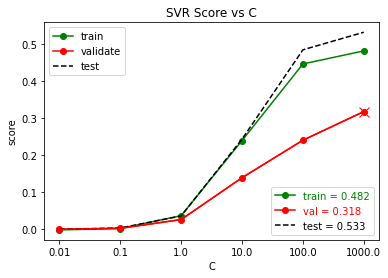

In [8]:
adjusted_parameter = 'C'
adjusted_parameter_values = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

SVMEstimators = train_estimators(X_train_scaled, y_train,
                                    SVR,
                                    adjusted_parameter, adjusted_parameter_values,
                                    gamma=0.0001,
                                    max_iter=10000)
plot_estimator_scores(SVMEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### Decision Tree Classification

Training DecisionTreeRegressor(max_depth=1, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=5, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=10, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=20, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=50, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=100, splitter='random', random_state=0)...


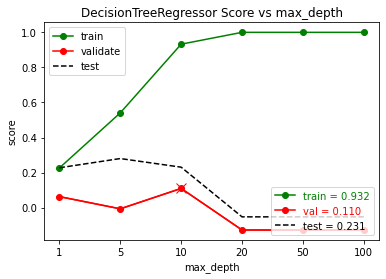

In [9]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

DecisionTreeEstimators = train_estimators(X_train_scaled, y_train,
                                            DecisionTreeRegressor,
                                            adjusted_parameter, adjusted_parameter_values,
                                            splitter='random',
                                            random_state=0)
plot_estimator_scores(DecisionTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### Random Forest Classification

Training RandomForestRegressor(max_depth=1, random_state=0)...
Training RandomForestRegressor(max_depth=5, random_state=0)...
Training RandomForestRegressor(max_depth=10, random_state=0)...
Training RandomForestRegressor(max_depth=20, random_state=0)...
Training RandomForestRegressor(max_depth=50, random_state=0)...
Training RandomForestRegressor(max_depth=100, random_state=0)...


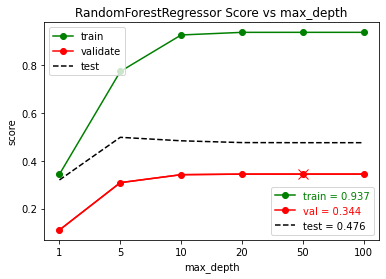

In [10]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

RandomTreeEstimators = train_estimators(X_train_scaled, y_train,
                                        RandomForestRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(RandomTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### K-Nearest Neighbours Classification

Training KNeighborsRegressor(weights=uniform, n_neighbors=2)...
Training KNeighborsRegressor(weights=distance, n_neighbors=2)...


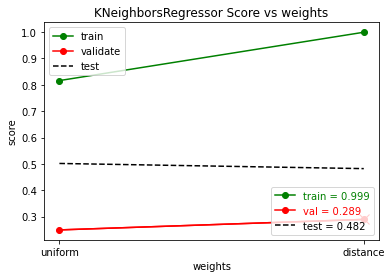

In [11]:
adjusted_parameter = 'weights'
adjusted_parameter_values = ['uniform','distance']

KNearestEstimators = train_estimators(X_train_scaled, y_train,
                                        KNeighborsRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

Training KNeighborsRegressor(algorithm=auto, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=ball_tree, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=kd_tree, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=brute, n_neighbors=2)...


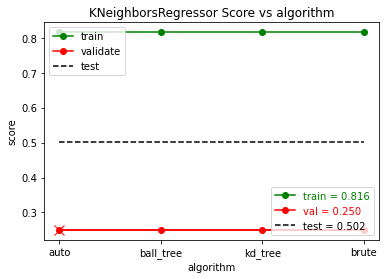

In [12]:
adjusted_parameter = 'algorithm'
adjusted_parameter_values = ['auto', 'ball_tree', 'kd_tree','brute']

KNearestEstimators = train_estimators(X_train_scaled, y_train,
                                        KNeighborsRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### Ada Boost Classification

Training AdaBoostRegressor(n_estimators=10, random_state=0)...
Training AdaBoostRegressor(n_estimators=50, random_state=0)...
Training AdaBoostRegressor(n_estimators=100, random_state=0)...
Training AdaBoostRegressor(n_estimators=500, random_state=0)...
Training AdaBoostRegressor(n_estimators=1000, random_state=0)...
Training AdaBoostRegressor(n_estimators=5000, random_state=0)...


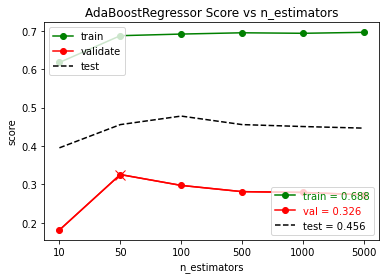

In [13]:
adjusted_parameter = 'n_estimators'
adjusted_parameter_values = [10, 50, 100, 500, 1000, 5000]

AdaBoostEstimators = train_estimators(X_train_scaled, y_train,
                                        AdaBoostRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(AdaBoostEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### Gaussian Naive Bayes Classification

In [14]:
gaussian_nb = GaussianProcessRegressor()
NaiveBayesEstimator = gaussian_nb.fit(X_train, y_train)
gaussian_nb_train_score = NaiveBayesEstimator.score(X_train, y_train)
gaussian_nb_test_score =  NaiveBayesEstimator.score(X_test, y_test)
gaussian_nb_val_score =  NaiveBayesEstimator.score(X_val, y_val)
print(f'{gaussian_nb_train_score=}, {gaussian_nb_val_score=}, {gaussian_nb_test_score=}')

gaussian_nb_train_score=0.9994356878533635, gaussian_nb_val_score=-95.85673991935056, gaussian_nb_test_score=-84.9162898176759


### Neural Network Classification Through a Multi-Layer Perceptron

In [15]:
mlp = MLPRegressor(hidden_layer_sizes=(), activation='relu',
                                            batch_size=100, max_iter=1000, learning_rate_init=0.01,
                                            momentum=0.4, random_state=0, verbose=False).fit(X_train, y_train)

print(f'Training Score: {mlp.score(X_train, y_train)}')
print(f'Testing Score: {mlp.score(X_test, y_test)}')
print(f'Validation Score: {mlp.score(X_val, y_val)}')

mlp = MLPRegressor(hidden_layer_sizes=(32), activation='relu',
                                            batch_size=100, max_iter=1000, learning_rate_init=0.001,
                                            momentum=0.4, random_state=0, verbose=False).fit(X_train, y_train)

print(f'Training Score: {mlp.score(X_train, y_train)}')
print(f'Testing Score: {mlp.score(X_test, y_test)}')
print(f'Validation Score: {mlp.score(X_val, y_val)}')

Training Score: 0.44923836909690584
Testing Score: 0.518450875734716
Validation Score: 0.2888949194275737
Training Score: 0.46450266987822886
Testing Score: 0.4688600212225895
Validation Score: 0.23289293911372388
